In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('train_data2.csv')
test = pd.read_csv('test_data2.csv')

In [4]:
Unique = ['order_id', 'product_id', 'seller_id', 'customer_id']
Continues = ['price', 'shipping_charges', 'payment_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
Categorical = [ 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'payment_type', 'product_category_name']
Ordinal = ['payment_sequential', 'payment_installments']
Datetime = ['order_purchase_timestamp', 'order_approved_at']

In [5]:
train.columns

Index(['order_id', 'product_id', 'seller_id', 'price', 'shipping_charges',
       'customer_id', 'order_purchase_timestamp', 'order_approved_at',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_volume_cm3', 'order_purchase_day', 'order_approved_day',
       'Is_late', 'order_deviation_delivered'],
      dtype='object')

In [6]:
#train['product_category_name'].fillna("NULL", inplace=True)
#test['product_category_name'].fillna("NULL", inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['customer_zip_code_prefix', 'customer_city', 'customer_state', 'payment_type', 'product_category_name', 'order_purchase_day', 'order_approved_day']


combined_df = pd.concat([train, test], ignore_index=True)

ziplabenc = LabelEncoder()
citlabenc = LabelEncoder()
sttlabenc = LabelEncoder()
typlabenc = LabelEncoder()
catlabenc = LabelEncoder()
seqordenc = LabelEncoder()
insordenc = LabelEncoder()

combined_df['customer_zip_code_prefix'] = ziplabenc.fit_transform(combined_df['customer_zip_code_prefix'])
combined_df['customer_city'] = citlabenc.fit_transform(combined_df['customer_city'])
combined_df['customer_state'] = sttlabenc.fit_transform(combined_df['customer_state'])
combined_df['payment_type'] = typlabenc.fit_transform(combined_df['payment_type'])
#combined_df['product_category_name'] = catlabenc.fit_transform(combined_df['product_category_name'])
combined_df['payment_sequential'] = seqordenc.fit_transform(combined_df['payment_sequential'])
combined_df['payment_installments'] = insordenc.fit_transform(combined_df['payment_installments'])

# Imputing Missing Value

In [8]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

X = combined_df.drop(columns=['product_category_name', 'order_id', 'product_id', 'seller_id', 'customer_id', 'Is_late', 'order_purchase_timestamp', 'order_approved_at', 'order_purchase_day', 'order_approved_day', 'order_deviation_delivered'])
y = combined_df['product_category_name']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

lgbm_classifier = LGBMClassifier(objective='multiclass', verbose=-1, num_classes=len(label_encoder.classes_))
lgbm_classifier.fit(X_train, y_train)

X_missing = combined_df[combined_df['product_category_name'].isnull()].drop(columns=['product_category_name', 'product_category_name', 'order_id', 'order_deviation_delivered', 'product_id', 'seller_id', 'customer_id', 'Is_late', 'order_purchase_timestamp', 'order_approved_at', 'order_purchase_day', 'order_approved_day'])
missing_predictions = lgbm_classifier.predict(X_missing)
combined_df.loc[combined_df['product_category_name'].isnull(), 'product_category_name'] = label_encoder.inverse_transform(missing_predictions)

c:\Users\HANIF\.pyenv\pyenv-win\versions\3.9.11\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HANIF\.pyenv\pyenv-win\versions\3.9.11\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125686 entries, 0 to 125685
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   order_id                   125686 non-null  object 
 1   product_id                 125686 non-null  object 
 2   seller_id                  125686 non-null  object 
 3   price                      125686 non-null  float64
 4   shipping_charges           125686 non-null  float64
 5   customer_id                125686 non-null  object 
 6   order_purchase_timestamp   125686 non-null  object 
 7   order_approved_at          125686 non-null  object 
 8   customer_zip_code_prefix   125686 non-null  int64  
 9   customer_city              125686 non-null  int32  
 10  customer_state             125686 non-null  int32  
 11  payment_sequential         125686 non-null  int64  
 12  payment_type               125686 non-null  int32  
 13  payment_installments       12

In [10]:
combined_df['customer_zip_code_prefix'] = ziplabenc.inverse_transform(combined_df['customer_zip_code_prefix'])
combined_df['customer_city'] = citlabenc.inverse_transform(combined_df['customer_city'])
combined_df['customer_state'] = sttlabenc.inverse_transform(combined_df['customer_state'])
combined_df['payment_type'] = typlabenc.inverse_transform(combined_df['payment_type'])
#combined_df['product_category_name'] = catlabenc.inverse_transform(combined_df['product_category_name'])
combined_df['payment_sequential'] = seqordenc.inverse_transform(combined_df['payment_sequential'])
combined_df['payment_installments'] = insordenc.inverse_transform(combined_df['payment_installments'])

In [11]:
train = combined_df.iloc[:len(train)]
test = combined_df.iloc[len(train):]

test.reset_index(drop=True, inplace=True)
test = test.drop(columns=['Is_late', 'order_deviation_delivered'])

In [12]:
#Data = [train, test]
#for dat in Data:
#    dat['customer_zip_code_prefix'] = ziplabenc.inverse_transform(dat['customer_zip_code_prefix'])
#    dat['customer_city'] = citlabenc.inverse_transform(dat['customer_city'])
#    dat['customer_state'] = sttlabenc.inverse_transform(dat['customer_state'])
#    dat['payment_type'] = typlabenc.inverse_transform(dat['payment_type'])
#    #dat['product_category_name'] = catlabenc.inverse_transform(dat['product_category_name'])
#    dat['payment_sequential'] = seqordenc.inverse_transform(dat['payment_sequential'])
#    dat['payment_installments'] = insordenc.inverse_transform(dat['payment_installments'])

## Change Data Type

In [13]:
for col in Datetime:
    train[col] = pd.to_datetime(train[col])
    if col in test.columns :
        test[col] = pd.to_datetime(test[col])
    else:
        next

C:\Users\HANIF\AppData\Local\Temp\ipykernel_8572\3994593629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.to_datetime(train[col])
C:\Users\HANIF\AppData\Local\Temp\ipykernel_8572\3994593629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = pd.to_datetime(train[col])


In [14]:
for col in Categorical:
    train[col] = train[col].astype('category')
    if col in test.columns :
        test[col] = test[col].astype('category')
    else:
        next

C:\Users\HANIF\AppData\Local\Temp\ipykernel_8572\2573246330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = train[col].astype('category')
C:\Users\HANIF\AppData\Local\Temp\ipykernel_8572\2573246330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = train[col].astype('category')
C:\Users\HANIF\AppData\Local\Temp\ipykernel_8572\2573246330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [15]:
from pandas.api.types import CategoricalDtype
ordinaltype = CategoricalDtype( ordered=True)

In [16]:
for col in Ordinal:
    train[col] = train[col].astype(ordinaltype)
    test[col] = test[col].astype(ordinaltype)

C:\Users\HANIF\AppData\Local\Temp\ipykernel_8572\1613629722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = train[col].astype(ordinaltype)
C:\Users\HANIF\AppData\Local\Temp\ipykernel_8572\1613629722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = train[col].astype(ordinaltype)


In [17]:
train['order_deviation_delivered'] = train['order_deviation_delivered'].str.extract('(-?\d+)').astype(int)

C:\Users\HANIF\AppData\Local\Temp\ipykernel_8572\2535758333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['order_deviation_delivered'] = train['order_deviation_delivered'].str.extract('(-?\d+)').astype(int)


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87407 entries, 0 to 87406
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   order_id                   87407 non-null  object        
 1   product_id                 87407 non-null  object        
 2   seller_id                  87407 non-null  object        
 3   price                      87407 non-null  float64       
 4   shipping_charges           87407 non-null  float64       
 5   customer_id                87407 non-null  object        
 6   order_purchase_timestamp   87407 non-null  datetime64[ns]
 7   order_approved_at          87407 non-null  datetime64[ns]
 8   customer_zip_code_prefix   87407 non-null  category      
 9   customer_city              87407 non-null  category      
 10  customer_state             87407 non-null  category      
 11  payment_sequential         87407 non-null  category      
 12  paym

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  38279 non-null  object        
 1   product_id                38279 non-null  object        
 2   seller_id                 38279 non-null  object        
 3   price                     38279 non-null  float64       
 4   shipping_charges          38279 non-null  float64       
 5   customer_id               38279 non-null  object        
 6   order_purchase_timestamp  38279 non-null  datetime64[ns]
 7   order_approved_at         38279 non-null  datetime64[ns]
 8   customer_zip_code_prefix  38279 non-null  category      
 9   customer_city             38279 non-null  category      
 10  customer_state            38279 non-null  category      
 11  payment_sequential        38279 non-null  category      
 12  payment_type      

In [20]:
train['order_deviation_delivered']

0       -14
1        -6
2       -14
3       -14
4       -17
         ..
87402   -14
87403    -8
87404   -22
87405    -5
87406   -21
Name: order_deviation_delivered, Length: 87407, dtype: int32

# Pandas Profiling

In [21]:
from ydata_profiling import ProfileReport
ProfileReport(train, title="Train DataFrame Profile Report", explorative=True)

Render HTML: 100%|██████████| 1/1 [00:07<00:00,  7.85s/it]


# Feature Engineering

In [32]:
train.drop(columns=['product_length_cm', 'product_height_cm', 'product_width_cm','order_purchase_day', 'order_approved_day'], inplace=True)
test.drop(columns=['product_length_cm', 'product_height_cm', 'product_width_cm','order_purchase_day', 'order_approved_day'], inplace=True)

C:\Users\HANIF\AppData\Local\Temp\ipykernel_8572\2137641197.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
date_columns = ['order_purchase_timestamp', 'order_approved_at']  

for df in [train, test]: 
    for column in date_columns:  
        
        df[column + '_day'] = df[column].dt.day
        df[column + '_month'] = df[column].dt.month
        df[column + '_week'] = ((df[column + '_day'] - 1) // 7) + 1

C:\Users\HANIF\AppData\Local\Temp\ipykernel_8572\379563609.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HANIF\AppData\Local\Temp\ipykernel_8572\379563609.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HANIF\AppData\Local\Temp\ipykernel_8572\379563609.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [48]:
train.drop(columns=['order_purchase_timestamp', 'order_approved_at'], inplace=True)
test.drop(columns=['order_purchase_timestamp', 'order_approved_at'], inplace=True)

C:\Users\HANIF\AppData\Local\Temp\ipykernel_8572\507787551.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87407 entries, 0 to 87406
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   order_id                        87407 non-null  object  
 1   product_id                      87407 non-null  object  
 2   seller_id                       87407 non-null  object  
 3   price                           87407 non-null  float64 
 4   shipping_charges                87407 non-null  float64 
 5   customer_id                     87407 non-null  object  
 6   customer_zip_code_prefix        87407 non-null  category
 7   customer_city                   87407 non-null  category
 8   customer_state                  87407 non-null  category
 9   payment_sequential              87407 non-null  category
 10  payment_type                    87407 non-null  category
 11  payment_installments            87407 non-null  category
 12  payment_value     

In [62]:
seller_grouped = train.groupby('seller_id')['order_deviation_delivered'].sum().reset_index()

train = train.merge(seller_grouped, on='seller_id', how='left')
test = test.merge(seller_grouped, on='seller_id', how='left')

train.rename(columns={'order_deviation_delivered_x': 'order_deviation_delivered', 'order_deviation_delivered_y': 'seller_order_deviation'}, inplace=True)
test.rename(columns={'order_deviation_delivered_x': 'order_deviation_delivered', 'order_deviation_delivered_y': 'seller_order_deviation'}, inplace=True)
train.drop(columns=['order_deviation_delivered'], inplace=True)
test.drop(columns=['order_deviation_delivered'], inplace=True)

# OverSampling

In [71]:
# Inverse transform for train DataFrame
train['customer_zip_code_prefix'] = ziplabenc.transform(train['customer_zip_code_prefix'])
train['customer_city'] = citlabenc.transform(train['customer_city'])
train['customer_state'] = sttlabenc.transform(train['customer_state'])
train['payment_type'] = typlabenc.transform(train['payment_type'])
train['product_category_name'] = catlabenc.fit_transform(train['product_category_name'])
train['payment_sequential'] = seqordenc.transform(train['payment_sequential'])
train['payment_installments'] = insordenc.transform(train['payment_installments'])

# Inverse transform for test DataFrame
test['customer_zip_code_prefix'] = ziplabenc.transform(test['customer_zip_code_prefix'])
test['customer_city'] = citlabenc.transform(test['customer_city'])
test['customer_state'] = sttlabenc.transform(test['customer_state'])
test['payment_type'] = typlabenc.transform(test['payment_type'])
test['product_category_name'] = catlabenc.transform(test['product_category_name'])
test['payment_sequential'] = seqordenc.transform(test['payment_sequential'])
test['payment_installments'] = insordenc.transform(test['payment_installments'])

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

In [ ]:
X = train.drop(columns=['Is_late'])
y = train['Is_late']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,  random_state=5)

# Initialize the SMOTETomek resampler
smt = SMOTETomek(random_state=42)

# Fit and resample the training data
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

c:\Users\HANIF\.pyenv\pyenv-win\versions\3.9.11\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HANIF\.pyenv\pyenv-win\versions\3.9.11\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


# Hyperparameter Tuning and Modelling

In [ ]:
import optuna

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#optuna.logging.set_verbosity(optuna.logging.WARNING)
optuna.logging.set_verbosity(optuna.logging.INFO)

In [ ]:
def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'objective': 'binary',
        'metric': 'binary_error',  #
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'random_state': 42,
        'learning_rate': trial.suggest_float('learning_rate', 0.00001, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'verbose':-1
    }

    model = LGBMClassifier(**params)
    model.fit(X_resampled, y_resampled, eval_set=[(X_test, y_test)])

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

best_params = study.best_params
print("Best Hyperparameters:", best_params)

In [ ]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 940, 'learning_rate': 0.09525005412327546, 'num_leaves': 97, 'max_depth': 17, 'subsample': 0.9609350622882716, 'colsample_bytree': 0.6160786751351319}


# Last Submit

In [ ]:
smt = SMOTETomek(random_state=42)

X_tr, y_tr = smt.fit_resample(X, y)

In [ ]:
test_df = test_df.drop(columns=['Is_late'])

In [ ]:
params = {'objective': 'binary',
        'metric': 'binary_error',
        'boosting_type': 'gbdt',
        'n_estimators': 940, 'learning_rate': 0.09525005412327546, 'num_leaves': 97, 'max_depth': 17, 'subsample': 0.9609350622882716, 'colsample_bytree': 0.6160786751351319,
        'verbose':-1,
        'random_state': 42,
        'eval_set':[(X_test, y_test)],}

In [ ]:
clff = LGBMClassifier(**params)
clff.fit(X_tr, y_tr)
y_pred = clff.predict(test_df)

In [ ]:
submit = pd.read_csv('test_data.csv')
submit['is_late'] = y_pred
submit = submit[['order_id', 'is_late']]

In [ ]:
submit['is_late'] = submit['is_late'].astype('int')

In [ ]:
submit['is_late'].value_counts()

0    37538
1      741
Name: is_late, dtype: int64

In [ ]:
submit['is_late'].isna().sum()

0

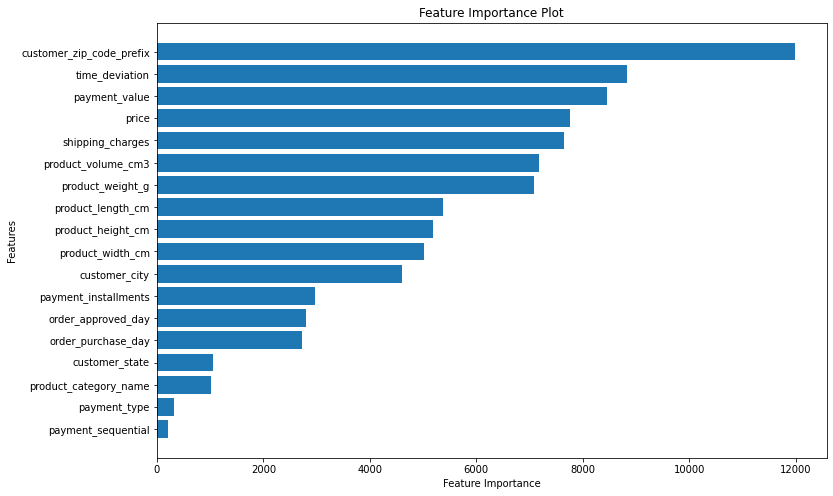

In [ ]:
feature_importances = clff.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Reverse the order to have the most important at the top
plt.show()

In [ ]:
submit.to_csv('submition4, LGBM, SMOTETOMEK.csv', index=False)